In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv(r'/content/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.shape

(1067, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [9]:
df.columns

Index(['MODELYEAR', 'Brands', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
df = df.drop(['MODELYEAR', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG'], axis=1) #axis=1 means column axis

In [11]:
df.isnull().sum()


,0
Brands,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_COMB,0
CO2EMISSIONS,0


In [12]:


df.isnull().sum().sum()

X = df[['ENGINESIZE','CYLINDERS']].values




In [13]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,11.580881,256.228679
std,1.415895,1.797447,4.101253,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,13.350000,294.000000
max,8.400000,12.000000,30.200000,25.800000,488.000000


In [14]:
def plotHistogram(variable):
  """
    Input: Variable/Column name
    Output: Histogram
  """
  plt.figure(figsize=(10,5))
  plt.hist(df[variable], bins=85, color="blue")
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title(f"Data Frequency - {variable}")
  plt.show()

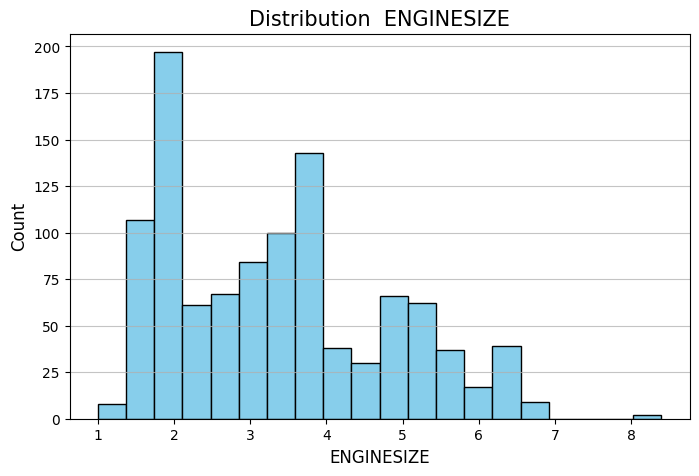

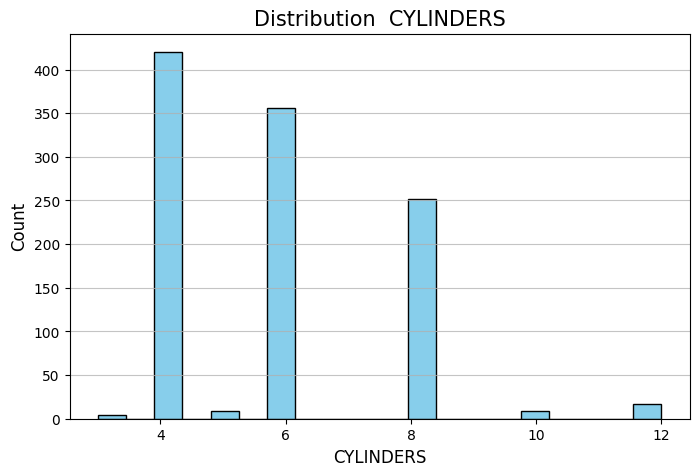

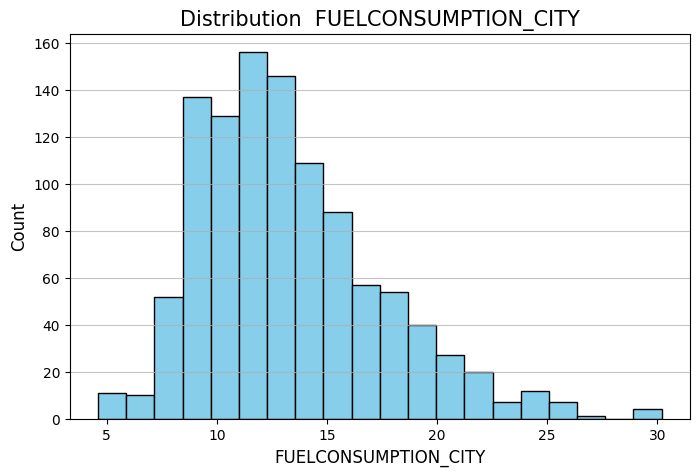

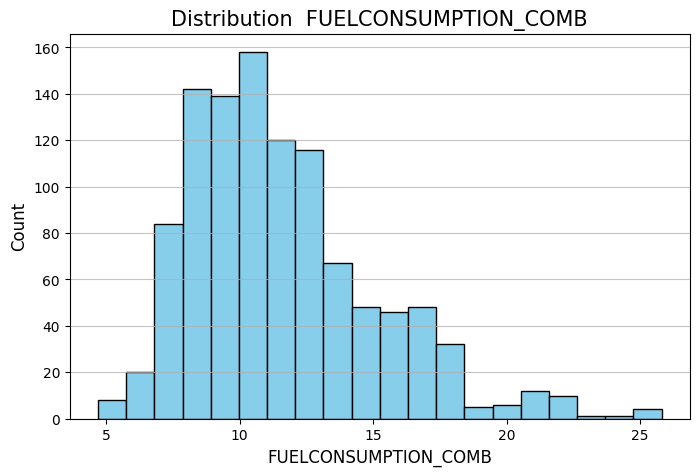

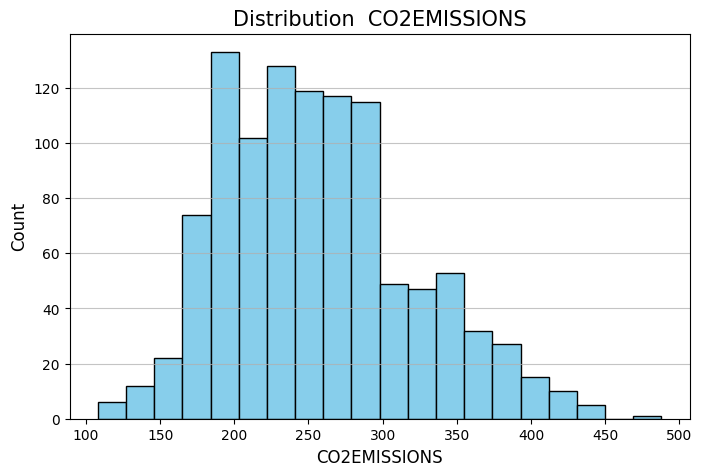

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_variables = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']

for col in numerical_variables:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution  {col}', fontsize=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [16]:
y = df['CO2EMISSIONS']

In [17]:
X = df.drop(['CO2EMISSIONS'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=101)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('FuelConsumptionCo2.csv')

X = df.drop(['CO2EMISSIONS', 'MODELYEAR', 'FUELCONSUMPTION_COMB_MPG'], axis=1)
y = df['CO2EMISSIONS']

X = pd.get_dummies(X, columns=['Brands', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been successfully transformed and scaled.")
print(f"Shape of X_train_scaled after transformation: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled after transformation: {X_test_scaled.shape}")
print("\nFirst 5 rows of X_train_scaled:\n", X_train_scaled[:5])

Data has been successfully transformed and scaled.
Shape of X_train_scaled after transformation: (853, 82)
Shape of X_test_scaled after transformation: (214, 82)

First 5 rows of X_train_scaled:
 [[0.05405405 0.11111111 0.14901961 0.12820513 0.14285714 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         

In [20]:
X_train.shape #Output: (15117, 19)

(853, 82)

In [21]:
pip install tensorflow

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 752ms/step - loss: 68831.9219 - val_loss: 66016.5625
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 68140.0625 - val_loss: 64107.0195
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 65571.6172 - val_loss: 61516.5898
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 63593.0391 - val_loss: 57853.2344
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 60007.1953 - val_loss: 52543.4297
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 52216.0039 - val_loss: 45213.0312
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 43819.1055 - val_loss: 35565.9844
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 34596.3477 - val_loss: 23890.6680
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 22126.4902 - val_loss: 11910.0283
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9913.6846 - val_loss: 3104.8967
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2320.1267 - val_loss: 826.7538
E

In [24]:
loss = pd.DataFrame(model.history.history)

<Axes: >

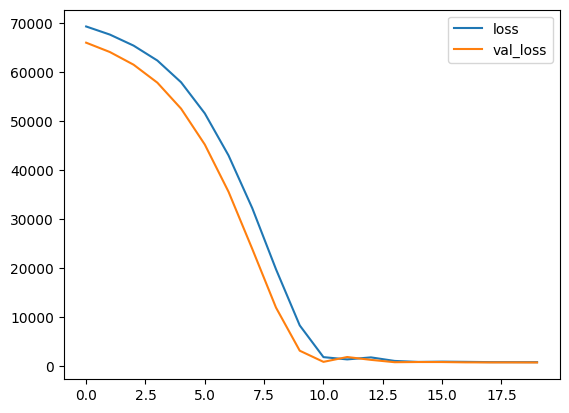

In [25]:
loss.plot()

In [26]:
predictions = model.predict(X_test)
predictions #list of predictions


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


array([[296.0588 ],
       [225.21233],
       [275.86777],
       [218.2684 ],
       [197.32005],
       [242.55804],
       [332.39484],
       [292.3126 ],
       [302.92294],
       [337.6345 ],
       [301.42856],
       [390.01654],
       [250.80312],
       [241.31148],
       [260.06723],
       [249.55037],
       [217.50877],
       [234.3724 ],
       [184.81285],
       [298.75632],
       [323.43698],
       [207.65872],
       [256.4386 ],
       [235.28786],
       [267.96774],
       [185.75468],
       [201.5111 ],
       [171.31192],
       [297.6717 ],
       [242.91815],
       [438.13516],
       [193.07816],
       [201.82417],
       [334.20627],
       [224.85402],
       [269.85156],
       [265.22018],
       [454.92795],
       [191.45746],
       [194.41351],
       [153.89487],
       [176.12016],
       [183.5388 ],
       [197.8419 ],
       [288.60812],
       [202.7216 ],
       [237.8957 ],
       [265.97354],
       [176.1775 ],
       [381.1182 ],


In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions) #using mse compare y_test and predictions


700.0146484375

In [31]:
import joblib
joblib.dump(model, "co2_regression_model.pkl")

['co2_regression_model.pkl']

In [32]:
loaded_model = joblib.load("co2_regression_model.pkl")

# Assuming you have new data for prediction, let's use a sample from X_test
# Replace this with your actual new data
sample_data = X_test.iloc[0].values.reshape(1, -1) # Reshape for prediction

# Scale the sample data using the same scaler used for training
sample_data_scaled = scaler.transform(sample_data)

# Make prediction
predicted_co2 = loaded_model.predict(sample_data_scaled)

print(f"Predicted CO2 Emissions for the sample data: {predicted_co2[0][0]}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
Predicted CO2 Emissions for the sample data: 29.069509506225586


In [33]:
model.save("co2_regression_model.h5")